In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /lustre/work/sunao.sugiyama/package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


## signal-to-noise ratio

In [4]:
dirname = './single_source_ClY1'
x,y,y_dict,cov, pnames, param_fid, F = hsc3x2pt.getFisherMat(dirname, power_b1)

cov.shape = (83, 83), dim(data)=(83,)


### galaxy clustering SNR

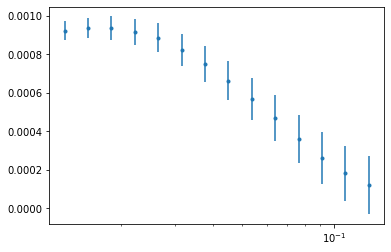

In [5]:
fig, ax = plt.subplots(1,1)

sample = 'lowz'
names = ','.join([sample]*2)

t = x.get_theta('w', names)
d = y.get_signal('w', names)
c = cov.get_covariance('w', names, 'w', names)
v = np.diag(c)**0.5
ax.errorbar(t, t*d, t*v, fmt='.')
#ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

In [6]:
ic = np.linalg.inv(c)
sn = np.dot(d, np.dot(ic, d))**0.5
print(sn)

20.407093179475446


In [7]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)
pk2cl.load_Cl_cache(dirname+'/fiducial')

20.407093179475446 399.9028762183872
28.17544044352334 180.2343343492555
27.34605854405116 315.0597524042487


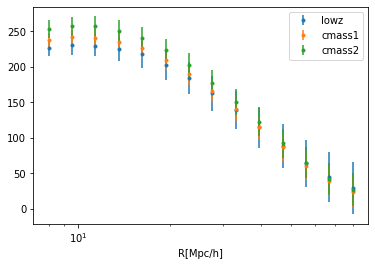

In [8]:
fig, ax = plt.subplots(1,1)

for sample in ['lowz', 'cmass1', 'cmass2']:
#for sample in ['lowz','cmass2']:
    names = ','.join([sample]*2)
    
    g_l = pk2cl.galaxy_sample_dict[sample]
    zl = g_l.z_lens_eff
    chil = g_l.z2chi(zl)
    dchil = g_l.get_Delta_chi_g()

    t = x.get_theta('w', names)
    d = y.get_signal('w', names)
    c = cov.get_covariance('w', names, 'w', names)
    v = np.diag(c)**0.5
    R = t*chil
    ax.errorbar(R, R*d*dchil, R*v*dchil, fmt='.', label=sample)
    
    ic = np.linalg.inv(c)
    sn = np.dot(d, np.dot(ic, d))**0.5
    print(sn, dchil)

ax.set_xscale('log')
ax.set_xlabel('R[Mpc/h]')
ax.legend()

plt.show()

## g-g lensing SNR

In [8]:
# Sigma_cr

In [11]:
pk2cl = hsc3x2pt.pk2cl_class(power_b1)
pk2cl.load_Cl_cache(dirname+'/fiducial')

In [20]:
g_l = pk2cl.galaxy_sample_dict['cmass2']
g_s = pk2cl.galaxy_sample_dict['s12']
zl = g_l.z_lens_eff
chil = g_l.z2chi(zl)
zs = g_s.z_source_eff
chis = g_s.z2chi(zs)
Sigma_cr = (3.0/2.0*hsc3x2pt.H0**2*(1+zl)*chil*(chis-chil)/chil)**-1.0

3.958136204295311
6.567873699572393
9.245255851693303


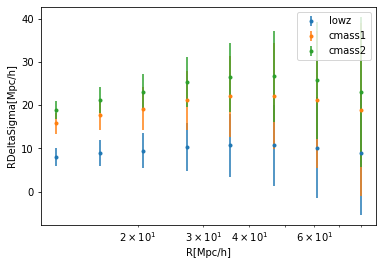

In [30]:
fig, ax = plt.subplots(1,1)

for sample in ['lowz', 'cmass1', 'cmass2']:
    names = ','.join([sample, 's12'])

    t = x.get_theta('gamma_t', names)
    d = y.get_signal('gamma_t', names)
    c = cov.get_covariance('gamma_t', names, 'gamma_t', names)
    v = np.diag(c)**0.5
    
    # sigma crit
    g_l = pk2cl.galaxy_sample_dict[sample]
    g_s = pk2cl.galaxy_sample_dict['s12']
    zl = g_l.z_lens_eff
    chil = g_l.z2chi(zl)
    zs = g_s.z_source_eff
    chis = g_s.z2chi(zs)
    Sigma_cr = (3.0/2.0*hsc3x2pt.H0**2*(1+zl)*chil*(chis-chil)/chil)**-1.0
    
    R = t*chil
    ax.errorbar(R, R*d*Sigma_cr, R*v*Sigma_cr, fmt='.', label=sample)
    
    ic = np.linalg.inv(c)
    sn = np.dot(d, np.dot(ic, d))**0.5
    print(sn)

ax.set_xscale('log')
ax.set_xlabel('R[Mpc/h]')
ax.set_ylabel('RDeltaSigma[Mpc/h]')
ax.legend()

plt.show()

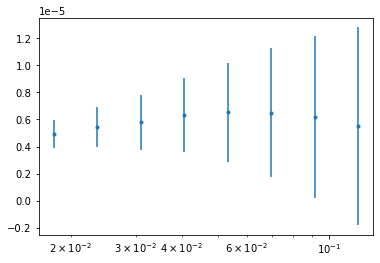

In [32]:
fig, ax = plt.subplots(1,1)

sample = 'lowz'
probe = 'gamma_t'
names = ','.join([sample, 's12'])

t = x.get_theta(probe, names)
d = y.get_signal(probe, names)
c = cov.get_covariance(probe, names, probe, names)
v = np.diag(c)**0.5
ax.errorbar(t, t*d, t*v, fmt='.')
#ax.set_yscale('log')
ax.set_xscale('log')

plt.show()

In [33]:
ic = np.linalg.inv(c)
sn = np.dot(d, np.dot(ic, d))**0.5
print(sn)

4.86651854387884
